In [1]:
import matplotlib.pyplot as plt

In [2]:
from pymatgen.ext.matproj import MPRester
with MPRester ("n58KMF7umZMAJXouXDJc0vORWlcEfEsD") as m:
    structure = m.get_structure_by_material_id("mp-15794")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

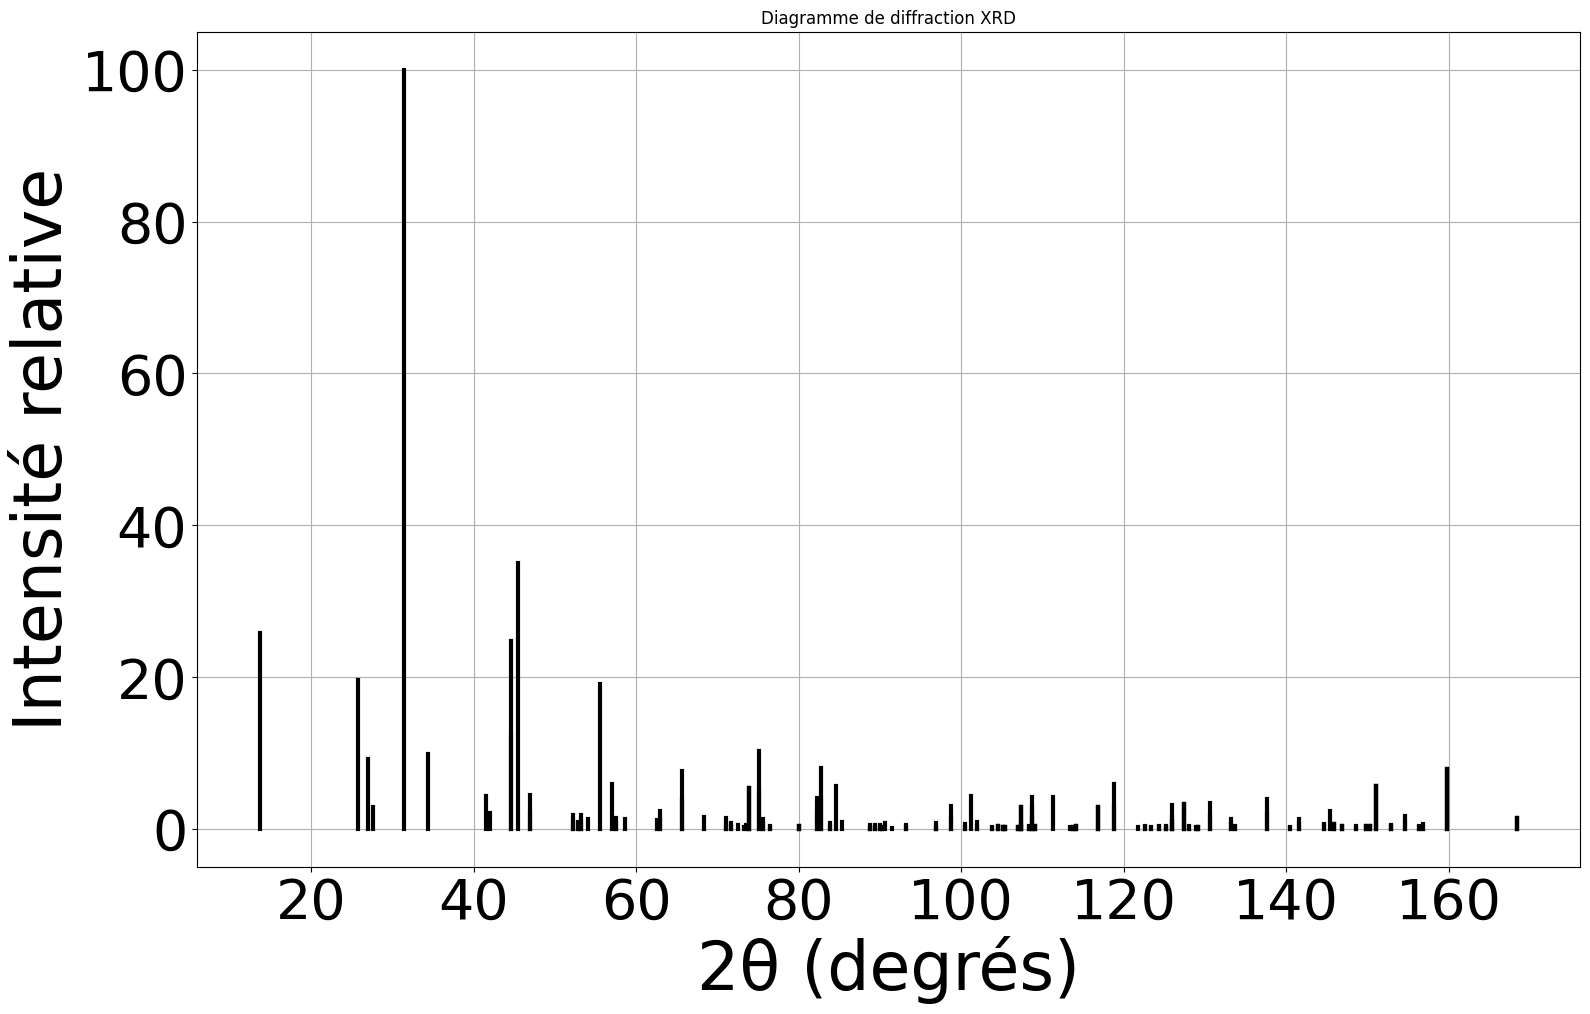

In [3]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
xrd = XRDCalculator(1.54060)
dif = xrd.get_pattern(structure)
fig = xrd.get_plot(structure, annotate_peaks=False, two_theta_range=[0,175])
plt.xlabel("2θ (degrés)")
plt.ylabel("Intensité relative")
plt.title("Diagramme de diffraction XRD")
plt.grid(True)
plt.show()

Détermination des 3 premiers pics

In [4]:
for i, (hkl_info, angle_2theta, intensity) in enumerate(zip(dif.hkls[:3], dif.x[:3], dif.y[:3]), start=1):
    hkl = hkl_info[0]['hkl']
    multiplicity = hkl_info[0]['multiplicity']

    print(f"Pic {i} :")
    print(f" Angle associé au pic {i} : 2θ = {angle_2theta:.2f}°")
    print(f" Intensité du pic {i}: {intensity:.2f}")
    print(f" Indices de Miller (hkl) : {hkl}")
    print(f" Multiplicité : {multiplicity}\n")


Pic 1 :
 Angle associé au pic 1 : 2θ = 13.71°
 Intensité du pic 1: 25.86
 Indices de Miller (hkl) : (1, 1, 1)
 Multiplicité : 2

Pic 2 :
 Angle associé au pic 2 : 2θ = 25.74°
 Intensité du pic 2: 19.54
 Indices de Miller (hkl) : (1, 0, 0)
 Multiplicité : 6

Pic 3 :
 Angle associé au pic 3 : 2θ = 26.96°
 Intensité du pic 3: 9.20
 Indices de Miller (hkl) : (1, 1, 0)
 Multiplicité : 6



# Explication des paramètres et interprétation 

-----Pramètres-----

. Angle 2θ : C'est l'angle de diffraction observé, correspondant à l'interférence constructive des rayons X réfléchis par les plans cristallins.

. Intensité : Elle reflète l'amplitude du pic dans le diagramme, ce qui est lié au facteur de structure et à la multiplicité des plans cristallins.

. Indices de Miller (hkl) : Ils indiquent les plans cristallins responsables de la diffraction.

. Multiplicité : Nombre de plans équivalents dans le cristal contribuant au même pic de diffraction.



-----Interprétation des résutats-----

. le premier pic à 13.71° avec l'indexation (1,1,1) et une faible multiplicité (2) montre un plan moins fréquent dans la structure.

. le deuxième pic à 25.74° correspond au plan (100) et a une multiplicité plus élevée (6), indiquant une contribution plus importante dans la diffraction.

. le troisième pic à 26.96° avec (110) a la même multiplicité que le second, mais une intensité plus faible, ce qui pourrait être dû aux facteurs structurels (facteur de structure et absorption).